# DEVTERN

## MACHINE LEARNING TASK - 01



## TASK  :  HEART DISEASE PREDICTION USING LOGISTIC REGRESSION 

### Importing necessary libraries 


In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve


# - DATA PREPARATION

### Importing Dataset 

In [68]:
df=pd.read_csv("Heart_Disease_Prediction.csv")

### Understanding the data 

In [69]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [70]:
df.shape

(270, 14)

In [71]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [72]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

### There are no null values in the data so data cleaning is not required

## DATA ANALYSIS

In [73]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

Text(0, 0.5, 'Count')

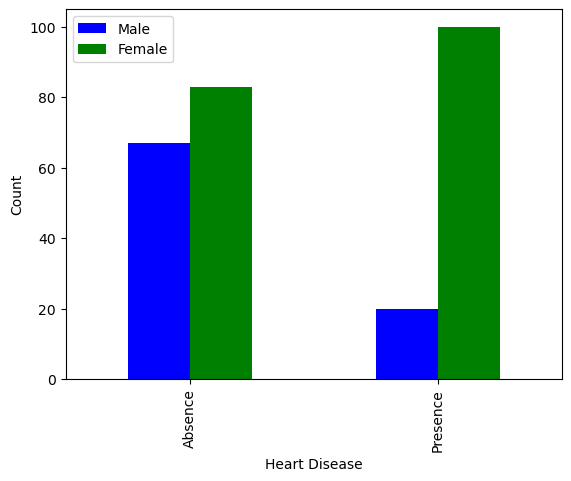

In [74]:
a = pd.crosstab( df["Heart Disease"], df.Sex).plot(kind='bar',color=['blue','green'])
a.legend(['Male','Female'])
a.set_ylabel('Count')

Text(0.5, 0, 'PBS OVER 120 ')

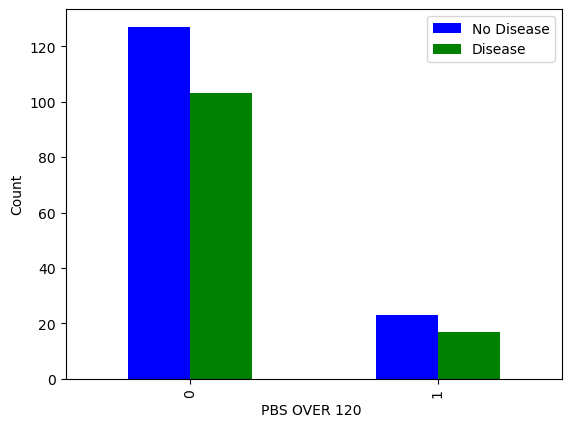

In [75]:
b= pd.crosstab(df["FBS over 120"],df["Heart Disease"]).plot(kind='bar',color=['blue','green'])
b.legend(['No Disease','Disease'])
b.set_ylabel('Count')
b.set_xlabel('PBS OVER 120 ')

### This graph shows that those who have PBS Over 120  have chances of heart disease 

Text(0, 0.5, 'Count')

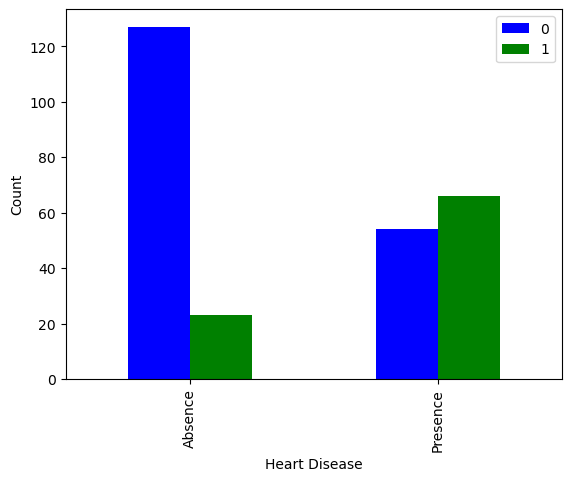

In [76]:
a = pd.crosstab( df["Heart Disease"], df["Exercise angina"]).plot(kind='bar',color=['blue','green'])
a.legend(['0','1'])
a.set_ylabel('Count')

### This graph shows that those who have heart disease have chances of exercise angina .

C:\Users\DELL\AppData\Local\Temp\ipykernel_14052\1912974054.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


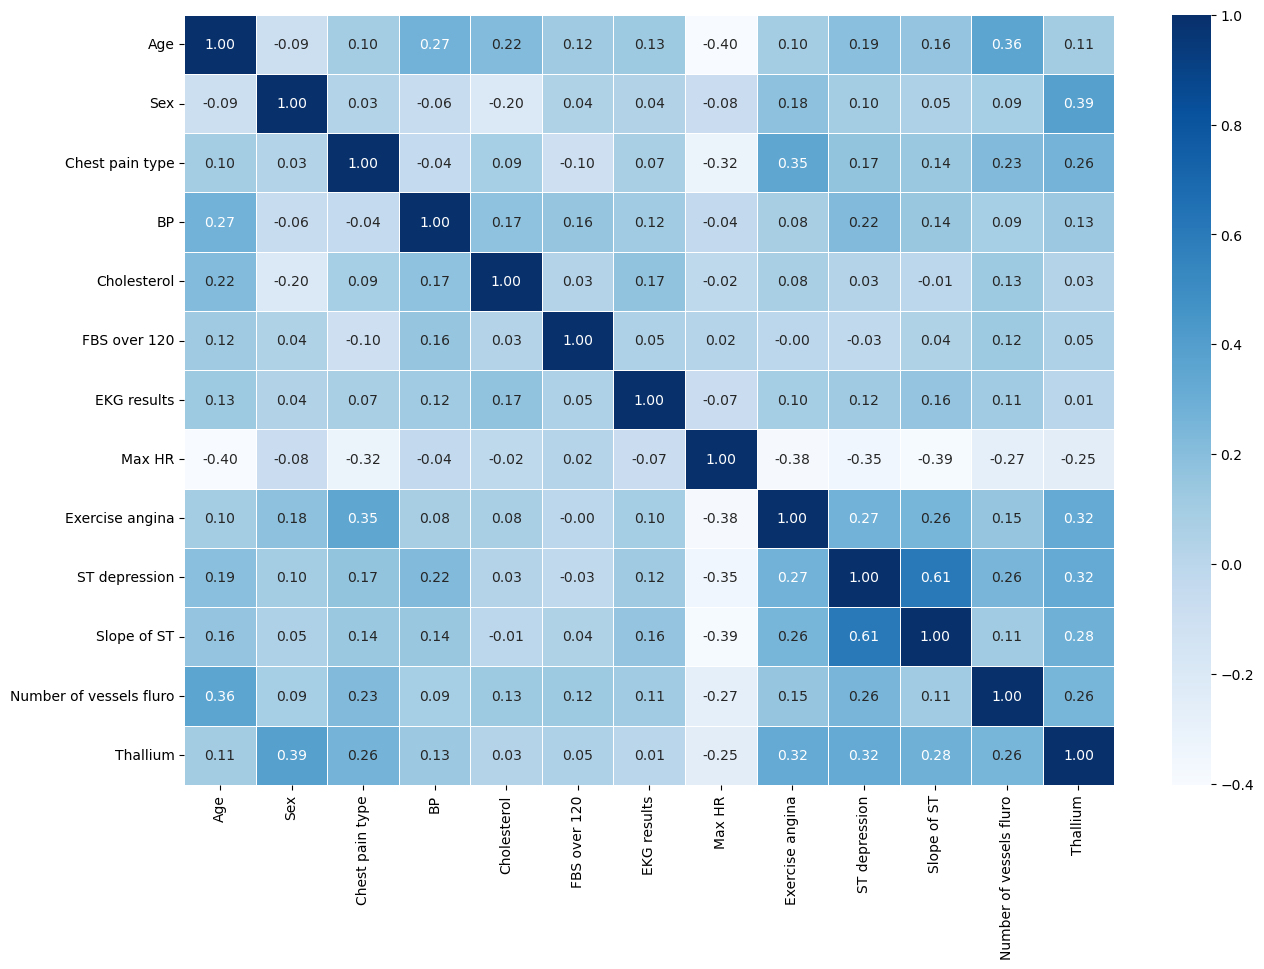

In [77]:
corrMatrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corrMatrix
                     ,annot=True
                     ,linewidths=0.5
                     ,fmt=".2f"
                     ,cmap="Blues"
                    )


# LETS BUILD OUR LG MODEL 
## THIS PROCESS INCLUDES
### 1- MODEL BUILDING
### 2- MODEL EVALUATION
### 3- FEATURE IMPORTANT ANALYSIS 

In [78]:
X = df.drop('Heart Disease',axis=1)
y = df['Heart Disease']

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,shuffle=True)

In [80]:
models = {'LogisticReg':LogisticRegression()
          ,'KNN': KNeighborsClassifier()
          ,"Random Forest": RandomForestClassifier()
         }

In [81]:
def evaluate(models,xtrain,xtest,ytrain,ytest):
  modelScores = {}
  for name,model in models.items():
      model.fit(xtrain,ytrain)
      modelScores[name] = model.score(xtest,ytest)
  return modelScores


In [82]:
mdlcmprsn = evaluate(models,xtrain,xtest,ytrain,ytest)


F:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


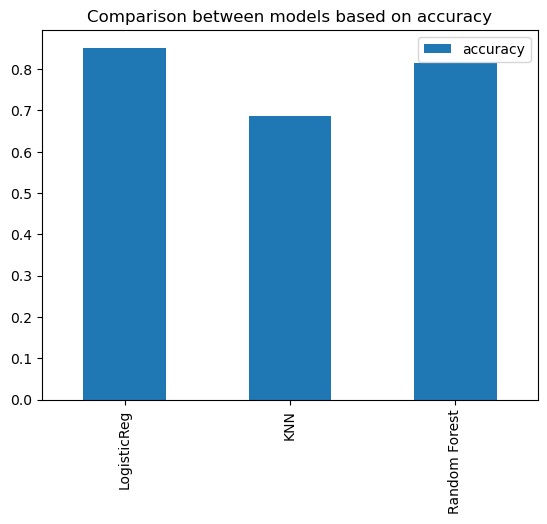

In [83]:
pd.DataFrame(mdlcmprsn,index=['accuracy']).T.plot.bar()
plt.title('Comparison between models based on accuracy');

In [84]:
trainScores = []
testScores = []
neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainScores.append(knn.score(xtrain,ytrain))
    testScores.append(knn.score(xtest,ytest))


The highest score KNN could achieve within the range of 1 to 21 was 74.07


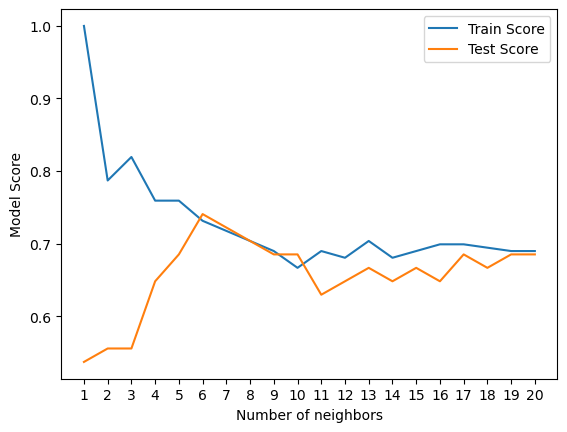

In [85]:
plt.plot(neighbors,trainScores,label='Train Score')
plt.plot(neighbors,testScores,label='Test Score')
plt.legend()
plt.xticks(np.arange(1,21))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
print(f'The highest score KNN could achieve within the range of 1 to 21 was {max(testScores)*100:.2f}')

In [86]:
logRegGrid = {
          "C": np.logspace(-4,4,20)
         ,"solver": ['liblinear']
         }
rfGrids = {
           "n_estimators": np.arange(10,1000,50)
          ,"max_depth": [None,3,5,10]
          ,"min_samples_split":np.arange(2,20,2)
          ,"min_samples_leaf": np.arange(1,20,2)
          }

In [87]:
rsLogReg = RandomizedSearchCV(LogisticRegression()
                             ,param_distributions=logRegGrid
                             ,cv=5
                             ,n_iter=20
                             ,verbose=True)
rsLogReg.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [88]:
rsLogReg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [89]:
rsLogReg.score(xtest,ytest)

0.8518518518518519

In [90]:
rsRF = RandomizedSearchCV(RandomForestClassifier()
                             ,param_distributions=rfGrids
                             ,cv=5
                             ,n_iter=20
                             ,verbose=True)
rsRF.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [91]:
rsRF.best_params_

{'n_estimators': 610,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [92]:
rsRF.score(xtest,ytest)

0.8148148148148148

In [93]:
logRegGrid = {
          "C": np.logspace(-4,4,30)
         ,"solver": ['liblinear']
         }
gsLogReg = GridSearchCV(
     LogisticRegression()
    ,param_grid=logRegGrid
    ,cv=5
    ,verbose=True
)
gsLogReg.fit(xtrain,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [94]:
gsLogReg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [95]:
gsLogReg.score(xtest,ytest)

0.8518518518518519

In [96]:
yPred = gsLogReg.predict(xtest)

In [97]:
confusion_matrix(ytest,yPred)

array([[26,  1],
       [ 7, 20]], dtype=int64)

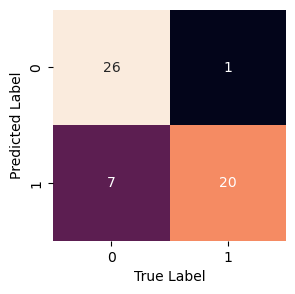

In [98]:
fig,ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(
     confusion_matrix(ytest,yPred)
    ,annot=True
    ,cbar=False
)

plt.xlabel('True Label')
plt.ylabel('Predicted Label');

In [99]:
print(classification_report(ytest,yPred))

              precision    recall  f1-score   support

     Absence       0.79      0.96      0.87        27
    Presence       0.95      0.74      0.83        27

    accuracy                           0.85        54
   macro avg       0.87      0.85      0.85        54
weighted avg       0.87      0.85      0.85        54



In [100]:
cross_val_score(gsLogReg,X,y,cv=5,scoring='accuracy')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.83333333, 0.85185185, 0.83333333, 0.85185185, 0.7962963 ])

In [101]:
cvA = np.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='accuracy',verbose=False))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [102]:
cross_val_score(gsLogReg,X,y,cv=5,scoring='precision')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_

array([nan, nan, nan, nan, nan])

In [103]:
cvP = np.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='precision'))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_

In [104]:
cvR = np.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='recall'))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_wis

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_wis

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_wis

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_wis

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1382, in _check_set_wis

In [105]:
cross_val_score(gsLogReg,X,y,cv=5,scoring='f1')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, l

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, l

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, l

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, l

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, l

array([nan, nan, nan, nan, nan])

In [106]:
cvF1 = np.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='f1'))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, l

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, l

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, l

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, l

Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "F:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, l

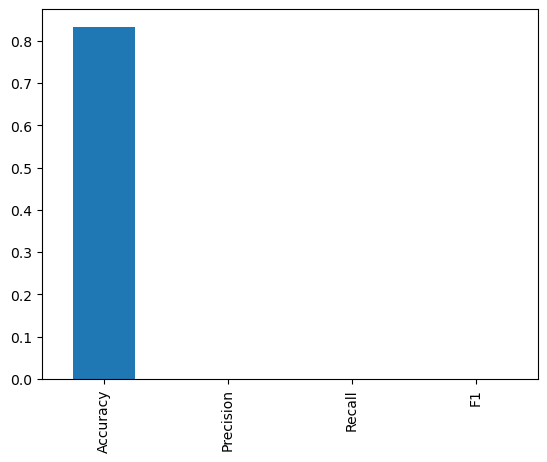

In [107]:
cvMetrics = pd.DataFrame({
     "Accuracy": cvA
    ,"Precision": cvP
    ,"Recall": cvR
    ,"F1": cvF1
            },index=[0])
cvMetrics.T.plot.bar(legend=False);

In [108]:
gsLogReg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [109]:
clf = LogisticRegression(
    C=0.1082636733874054
    ,solver='liblinear')
clf.fit(xtrain,ytrain)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [110]:
feature = dict(zip(df.columns,list(clf.coef_[0])))

In [111]:
feature

{'Age': -0.03912887855639917,
 'Sex': 0.35373923575451816,
 'Chest pain type': 0.36070866354855097,
 'BP': 0.013243415014658639,
 'Cholesterol': 0.003217715261880681,
 'FBS over 120': -0.1919269900438612,
 'EKG results': 0.20041476973620823,
 'Max HR': -0.03534683560624085,
 'Exercise angina': 0.3948983417025897,
 'ST depression': 0.33404464387995386,
 'Slope of ST': 0.1173288739137128,
 'Number of vessels fluro': 0.6047863440074122,
 'Thallium': 0.4246892198418695}

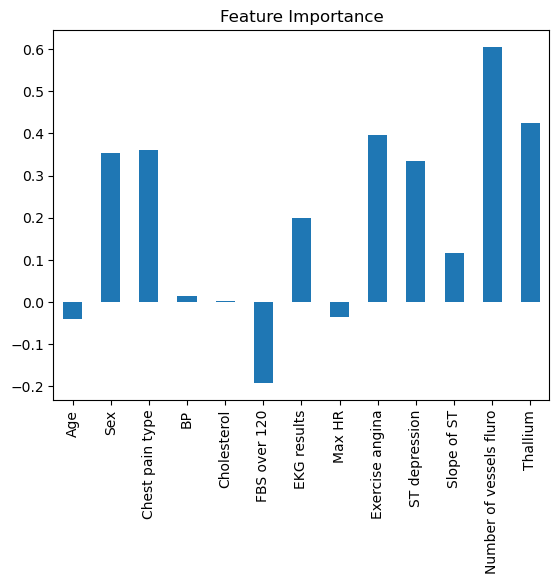

In [112]:
pd.DataFrame(feature,index=[0]).T.plot.bar(title="Feature Importance",legend=False);